In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/KITA_2024/M8_Vision응용/data

/content/drive/MyDrive/KITA_2024/M8_Vision응용/data


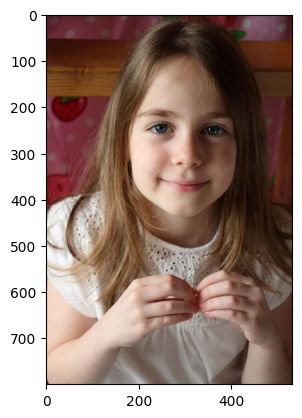

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


filepath = '/content/drive/MyDrive/KITA_2024/M8_Vision응용/data/girl.png'
img = cv2.imread(filepath)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('girl1.png', img)

In [ ]:
img.shape

(800, 533, 3)

True

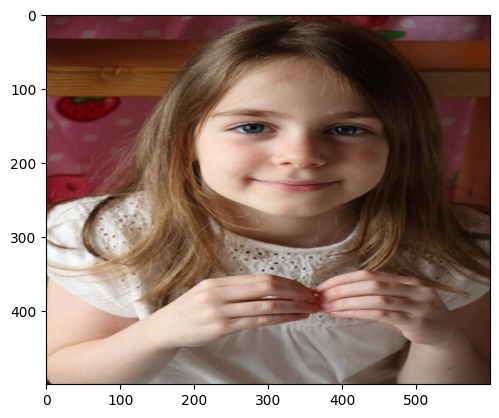

In [ ]:
resized_img = cv2.resize(img, (600, 500))
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
cv2.imwrite('resized_girl.png', resized_img)

In [ ]:
resized_img.shape

(500, 600, 3)

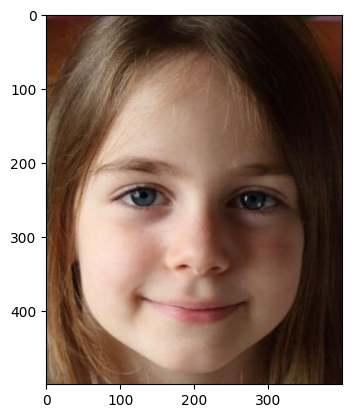

In [ ]:
cropped_img = img[50:450, 150:450]

cropped_img = cv2.resize(cropped_img, (400, 500))
cv2.imwrite('cropped_girl.png', cropped_img)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.show()

[얼굴 검출 캐스케이드-얼굴 요소 데이터베이스]

https://github.com/opencv/opencv/tree/master/data/haarcascades


- 캐스케이드 파일은 컴퓨터 비전에서 객체 검출에 사용되는 파일로, 특히 Haar Cascade 분류기에 의해 사용됩니다. 이 파일은 얼굴, 눈, 차량 번호판 등과 같은 객체를 검출하기 위해 사전에 학습된 데이터를 포함합니다. Haar Cascade는 Paul Viola와 Michael Jones에 의해 개발된 알고리즘으로, 빠른 객체 검출을 가능하게 하는 여러 단계의 분류기로 구성됩니다.

- 캐스케이드 파일(.xml 형식)은 사전에 학습된 특징들의 집합을 포함하며, 이 특징들은 객체 검출 과정에서 사용됩니다. 예를 들어, 얼굴 검출을 위한 캐스케이드 파일은 얼굴의 특정 부분(눈, 코, 입 등)이 가지는 빛과 그림자의 패턴을 인식할 수 있는 데이터를 포함합니다. 이 데이터는 이미지에서 얼굴을 효과적으로 찾아내는 데 사용됩니다.

[ 사용 방법 ]
- cv2.CascadeClassifier 함수를 사용하여 사전에 학습된 캐스케이드 파일을 로드. 이 파일은 얼굴, 눈 등을 검출하기 위해 필요한 정보를 포함
- 대상 이미지를 그레이스케일로 변환합니다. Haar 기능은 그레이스케일 이미지에서 더 잘 작동하기 때문임.
- 분류기의 detectMultiScale 메소드를 사용하여 이미지 내의 객체를 검출. 이 메소드는 이미지 내에서 캐스케이드 파일에 정의된 패턴을 찾으려 시도. 각 객체에 대해 위치와 크기(사각형으로 표현됨)가 반환


face rectangle =  149 127 316 316


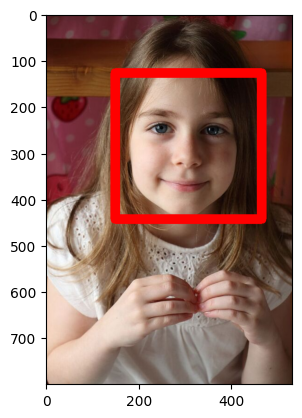

In [ ]:
cascade_file = 'haarcascade_frontalface_alt.xml'  # 정면 얼굴 검출용 캐스케이드 파일
cascade = cv2.CascadeClassifier(cascade_file)  # 검출기는 캐스케이드 파일을 지정해 다양한 물체 검출

# 이미지 읽고 그레이스케일로 변환
# 밝은 부분은 흰색, 어두운 부분은 검은색으로 표현된 이미지, 코는 밝은 부분, 코의 양옆은 어두운 부분
# 얼굴 영역중에 중앙에 밝은 부분이 있다면 얼굴로 판단, 각 요소의 명암패턴을 결합해 얼굴의 형태 확인
filepath = 'girl1.png'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

if len(face_list) == 0:
    print('no face')
    quit()

for (x, y, w, h) in face_list:
    print('face rectangle = ', x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

cv2.imwrite('face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

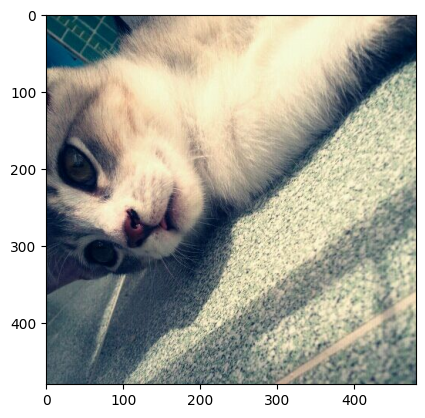

In [ ]:
img = cv2.imread('cat.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [40]:
def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 원래 사이즈로 확대하기 - 블러처리 됨
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

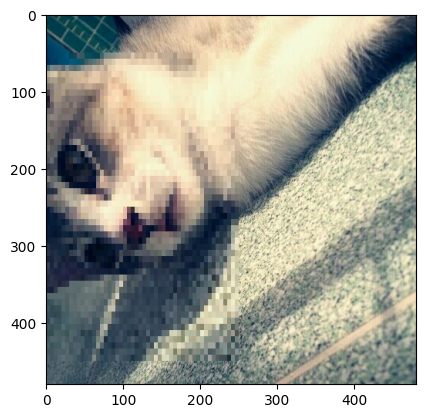

In [41]:
import cv2
from mosaic import mosaic as mosaic

img = cv2.imread('cat.png')
mos = mosaic(img, (0, 50, 250, 450), 50)

cv2.imwrite('cat-mosaic.png', mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

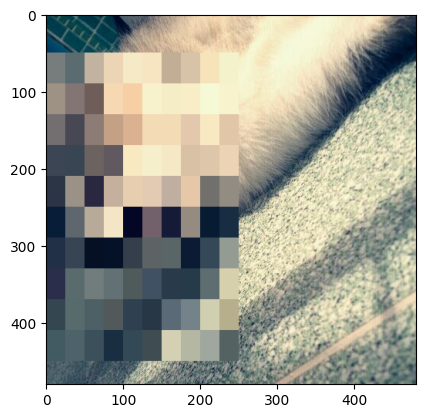

In [42]:
import cv2
from mosaic import mosaic as mosaic

img = cv2.imread("cat.png")
mos = mosaic(img, (0, 50, 250, 450), 10)

cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

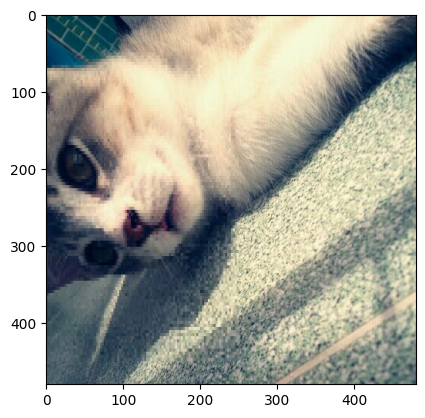

In [43]:
import cv2
from mosaic import mosaic as mosaic

img = cv2.imread("cat.png")
mos = mosaic(img, (0, 50, 250, 450), 100)

cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

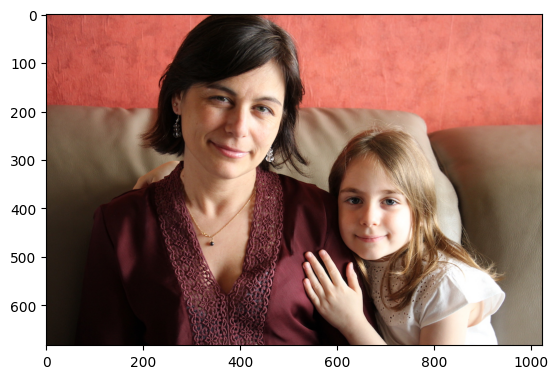

In [44]:
family = cv2.imread('family.jpg')
plt.imshow(cv2.cvtColor(family, cv2.COLOR_BGR2RGB))

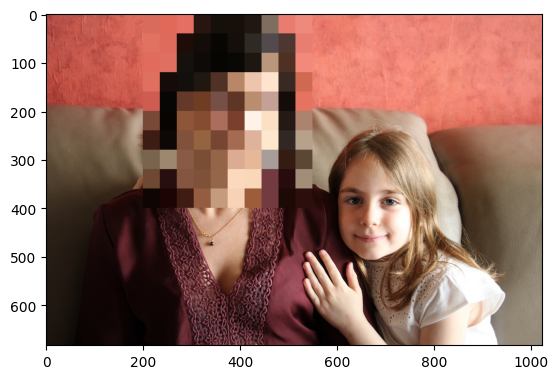

In [45]:
mos = mosaic(family, (200, 0, 550, 400), 10)

plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

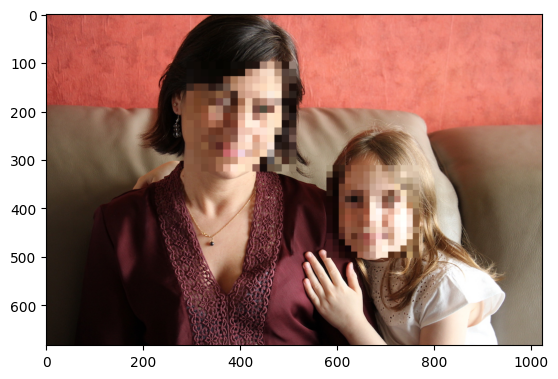

<class 'numpy.ndarray'>
얼굴의 좌표 =  290 98 227 227
얼굴의 좌표 =  579 312 191 191
2
(2, 4)


In [46]:
import cv2  # OpenCV 라이브러리 임포트

# 얼굴 인식을 위한 Haar Cascade 파일 경로 설정, 얼굴 특징을 인식하기 위한 미리 학습된 데이터
cascade_file = 'haarcascade_frontalface_alt.xml'
# CascadeClassifier 객체 생성 (얼굴 인식 모델 로드)
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어옴 (컬러 이미지)
img = cv2.imread('family.jpg')
# 이미지를 그레이스케일로 변환 (얼굴 인식을 더 효율적으로 수행)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴을 감지하여 얼굴의 좌표 리스트를 반환 (최소 크기: 150x150)
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

# 얼굴이 감지되지 않은 경우 프로그램 종료
if len(face_list) == 0: quit()

# 감지된 얼굴 좌표를 이용해 얼굴 부분에 모자이크 적용
for (x, y, w, h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 15)  # 모자이크 크기 15로 설정

# 모자이크 처리된 이미지를 저장
cv2.imwrite('family-mosaic.png', img)

# 모자이크 처리된 이미지를 화면에 표시 (BGR에서 RGB로 변환)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 감지된 얼굴 좌표 리스트의 데이터 타입 출력
print(type(face_list))

# 감지된 얼굴 좌표 출력 (x, y 좌표와 w, h 크기)
for (x, y, w, h) in face_list:
    print('얼굴의 좌표 = ', x, y, w, h)

# 감지된 얼굴의 개수 출력
print(len(face_list))

# 감지된 얼굴 리스트의 배열 형태 출력 (얼굴이 없으면 오류 가능)
print(face_list.shape)


Q. 5명 이상 얼굴 사진이 들어있는 이미지를 다운로드 받아서 모자이크 처리를 하세요.

In [47]:
import cv2


def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    # 모자이크한 영역의 윤곽선 그리기
    cv2.rectangle(img2, (x1, y1), (x2, y2), (0, 255, 0), 3)
    return img2

In [50]:
import cv2

cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("people.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(50, 50))

if len(face_list) == 0:
    quit()

for x, y, w, h in face_list:
    img = mosaic(img, (x, y, x + w, y + h), 5)
plt.figure(figsize=(30, 20))
cv2.imwrite("people-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

print(type(face_list))
for x, y, w, h in face_list:
    print("얼굴의 좌표 = ", x, y, w, h)

print(len(face_list))
print(face_list.shape)

Output hidden; open in https://colab.research.google.com to view.

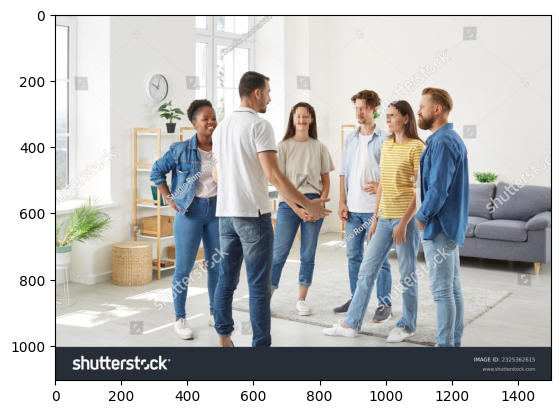

In [51]:
# 사람 얼굴에 자동으로 모자이크 처리
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성
cascade_file = '/content/drive/MyDrive/KITA_2024/M8_Vision응용/data/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환
img = cv2.imread('/content/drive/MyDrive/KITA_2024/M8_Vision응용/data/people.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출
face_list = cascade.detectMultiScale(img_gray, minSize=(50,50))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리
for (x,y,w,h) in face_list:
    img = mosaic(img, (x,y,x+w,y+h), 10)

# 이미지 출력
cv2.imwrite('/content/drive/MyDrive/KITA_2024/M8_Vision응용/data/people.jpg', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

OpenCV를 활용한 영상 처리
- OpenCV의 VideoCapture 클래스
  - 동영상을 개별 Frame으로 하나씩 읽어들이는 기능 제공
  - 생성 인자로 입력 video 파일 위치를 받아 생성
    - cap=cv2.VideoCapture(video_input_path)
  - 입력 video 파일의 다양한 속성 가져오기 가능
    - 영상 Frame 너비
    - cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    - 영상 Frame 높이
    - cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    - 영상 FPS(Frame Per Second)
    - cap.get(cv2.CAP_PROP_FPS)
  - read()는 마지막 Frame까지 차례로 Frame을 읽음
- VideoWriter
  - VideoCapture로 읽어들인 개별 Frame을 동영상 파일로 Write 수행
  - write할 동영상 파일 위치, Encoding 코덱 유형, write fps 수치, frame 크기를 생성자로 입력 받음
  - 이들 값에 따른 동영상 write 수행
  - write 시, 특정 포맷으로 동영상 Encoding 가능
    - DIVX, XVID, MJPG, X264, WMV1, WMV2

In [54]:
!wget -O Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2024-09-25 01:12:50--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/Night_Day_Chase.mp4 [following]
--2024-09-25 01:12:50--  https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/Night_Day_Chase.mp4 [following]
--2024-09-25 01:12:50--  https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.

In [55]:
!ls

cat-mosaic.png	    family-mosaic.png		     lady.png			 __pycache__
cat_mosaic.png	    family_mosaic.png		     lena.png			 resized_girl.png
cat.png		    flower1.jpg			     mosaic.py			 sample.png
cropped_girl.png    flower2.jpg			     Night_Day_Chase.mp4	 test.png
cut_crop.png	    girl1.png			     Nite_Day_Chase_out_rec.mp4  tree.jpg
dog.jpg		    girl.png			     noname.png			 yeosu.jpg
face-detect.png     haarcascade_frontalface_alt.xml  out_resize.png
family.jpg	    image01.jpg			     people.jpg
family_mosaic1.png  image02.jpg			     people-mosaic.png


In [56]:
from google.colab import files
files.download('Night_Day_Chase.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- openCV를 사용하여 비디오 스트림(예: 비디오 파일, 카메라 입력 등)에서 프레임을 읽고 각 프레임에 대해 특정 작업을 수행한 뒤 결과를 비디오 파일로 쓰는 과정

In [60]:
import cv2
# 입력 비디오 파일 경로 설정
video_input_path = 'Night_Day_Chase.mp4'

# 출력 비디오 파일 저장 경로 설정
video_output_path='/content/drive/MyDrive/KITA_2024/M8_Vision응용/data/Night_Day_Chase_out_rec.mp4'

# OpenCV를 사용해 입력 비디오 파일 열기
cap = cv2.VideoCapture(video_input_path)

# 비디오 코덱 설정 (여기서는 'XVID' 사용)
codec = cv2.VideoWriter_fourcc(*'XVID')

# 입력 비디오의 프레임 크기 가져오기 (가로, 세로 크기)
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))  # 예: (200, 400)

# 입력 비디오의 초당 프레임 수(FPS) 가져오기
vid_fps = cap.get(cv2.CAP_PROP_FPS)

# 비디오 파일 작성기 생성 (코덱, FPS, 크기 설정)
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)

# 비디오의 총 프레임 개수 가져오기
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 총 프레임 개수, FPS, 프레임 크기 출력
print('총 Frame 개수:', frame_cnt, 'FPS:', round(vid_fps), 'Frame 크기:', vid_size)


총 Frame 개수: 1383 FPS: 28 Frame 크기: (1216, 516)


- 비디오를 프레임 단위로 읽고, 각 프레임에 사각형과 현재 프레임 번호를 텍스트로 추가한 후, 새로운 비디오 파일로 저장합니다.
- 처리 시간도 계산하여 출력합니다.
- 마지막으로 비디오 파일과 관련된 리소스를 해제합니다.

In [61]:
import time
greed_color=(0,255,0)
red_color=(0,0,255)

start=time.time()
index=0

while True:
    hasFrame,img_frame=cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index+=1
    print('frame:', index, '처리완료')

    cv2.rectangle(img_frame, (300,100,800,400), color=greed_color, thickness=2)
    caption='frame:{}'.format(index)
    # 각 프레임에 텍스트를 추가, 텍스트는 현재 프레임의 인덱스 (300,95)는 위치할 좌표
    cv2.putText(img_frame, caption, (300,95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)

    vid_writer.write(img_frame)

print('write 완료 시간:', round(time.time()-start,4))
## 비디오 쓰기 객체와 비디오캡처 객체를 해제
## 리소스를 정리하고 새비디오 파일의 쓰기를 완료하는 데 필요
vid_writer.release()
cap.release()

frame: 1 처리완료
frame: 2 처리완료
frame: 3 처리완료
frame: 4 처리완료
frame: 5 처리완료
frame: 6 처리완료
frame: 7 처리완료
frame: 8 처리완료
frame: 9 처리완료
frame: 10 처리완료
frame: 11 처리완료
frame: 12 처리완료
frame: 13 처리완료
frame: 14 처리완료
frame: 15 처리완료
frame: 16 처리완료
frame: 17 처리완료
frame: 18 처리완료
frame: 19 처리완료
frame: 20 처리완료
frame: 21 처리완료
frame: 22 처리완료
frame: 23 처리완료
frame: 24 처리완료
frame: 25 처리완료
frame: 26 처리완료
frame: 27 처리완료
frame: 28 처리완료
frame: 29 처리완료
frame: 30 처리완료
frame: 31 처리완료
frame: 32 처리완료
frame: 33 처리완료
frame: 34 처리완료
frame: 35 처리완료
frame: 36 처리완료
frame: 37 처리완료
frame: 38 처리완료
frame: 39 처리완료
frame: 40 처리완료
frame: 41 처리완료
frame: 42 처리완료
frame: 43 처리완료
frame: 44 처리완료
frame: 45 처리완료
frame: 46 처리완료
frame: 47 처리완료
frame: 48 처리완료
frame: 49 처리완료
frame: 50 처리완료
frame: 51 처리완료
frame: 52 처리완료
frame: 53 처리완료
frame: 54 처리완료
frame: 55 처리완료
frame: 56 처리완료
frame: 57 처리완료
frame: 58 처리완료
frame: 59 처리완료
frame: 60 처리완료
frame: 61 처리완료
frame: 62 처리완료
frame: 63 처리완료
frame: 64 처리완료
frame: 65 처리완료
frame: 66 처리완료
frame: 67 처리완료
fram

In [62]:
from google.colab import files
files.download('Night_Day_Chase_out_rec.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###### 비디오 정면 얼굴 인식

In [63]:
import cv2

video_input_path = 'Night_Day_Chase.mp4'
video_output_path='Night_Day_Chase_out_face.mp4'

cap = cv2.VideoCapture(video_input_path)
codec = cv2.VideoWriter_fourcc(*'XVID')
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))  # 예: (200, 400)
vid_fps = cap.get(cv2.CAP_PROP_FPS)
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#print('총 Frame 개수:', frame_cnt, 'FPS:', round(vid_fps), 'Frame 크기:', vid_size)

## 얼굴 인식을 위한 Harr Cascade로드
## OpenCV에서 기본적으로 제공하는 Haar Cascade XML 파일들이 저장된 경로에 추가로...
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

start=time.time()
index=0

while True:
    hasFrame,img_frame=cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    ## 프레임을 그레이스케일로 변환하여 얼굴 검출 수행
    gray=cv2.cvtColor(img_frame, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.1, 4) ## 이미지 크기 조정 비율: 더 큰 값으로 줄이면 정확도 커지지만 수행 시간 증가, 최소 이웃 수 (최소한 4번)
    ## 검출된 얼굴 주위에 사각형 그리기
    for (x,y,w,h) in faces:
        cv2.rectangle(img_frame, (x,y), (x+w, y+h), (0,255,0), 2)

    index+=1
    print('frame:', index, '처리완료')

    vid_writer.write(img_frame)

print('write 완료 시간:', round(time.time()-start,4))
## 비디오 쓰기 객체와 비디오캡처 객체를 해제
## 리소스를 정리하고 새비디오 파일의 쓰기를 완료하는 데 필요
vid_writer.release()
cap.release()

frame: 1 처리완료
frame: 2 처리완료
frame: 3 처리완료
frame: 4 처리완료
frame: 5 처리완료
frame: 6 처리완료
frame: 7 처리완료
frame: 8 처리완료
frame: 9 처리완료
frame: 10 처리완료
frame: 11 처리완료
frame: 12 처리완료
frame: 13 처리완료
frame: 14 처리완료
frame: 15 처리완료
frame: 16 처리완료
frame: 17 처리완료
frame: 18 처리완료
frame: 19 처리완료
frame: 20 처리완료
frame: 21 처리완료
frame: 22 처리완료
frame: 23 처리완료
frame: 24 처리완료
frame: 25 처리완료
frame: 26 처리완료
frame: 27 처리완료
frame: 28 처리완료
frame: 29 처리완료
frame: 30 처리완료
frame: 31 처리완료
frame: 32 처리완료
frame: 33 처리완료
frame: 34 처리완료
frame: 35 처리완료
frame: 36 처리완료
frame: 37 처리완료
frame: 38 처리완료
frame: 39 처리완료
frame: 40 처리완료
frame: 41 처리완료
frame: 42 처리완료
frame: 43 처리완료
frame: 44 처리완료
frame: 45 처리완료
frame: 46 처리완료
frame: 47 처리완료
frame: 48 처리완료
frame: 49 처리완료
frame: 50 처리완료
frame: 51 처리완료
frame: 52 처리완료
frame: 53 처리완료
frame: 54 처리완료
frame: 55 처리완료
frame: 56 처리완료
frame: 57 처리완료
frame: 58 처리완료
frame: 59 처리완료
frame: 60 처리완료
frame: 61 처리완료
frame: 62 처리완료
frame: 63 처리완료
frame: 64 처리완료
frame: 65 처리완료
frame: 66 처리완료
frame: 67 처리완료
fram

In [65]:
!ls

cat-mosaic.png	    flower2.jpg			     noname.png
cat_mosaic.png	    girl1.png			     out_resize.png
cat.png		    girl.png			     people.jpg
cropped_girl.png    haarcascade_frontalface_alt.xml  people-mosaic.png
cut_crop.png	    image01.jpg			     __pycache__
dog.jpg		    image02.jpg			     resized_girl.png
face-detect.png     lady.png			     sample.png
family.jpg	    lena.png			     test.png
family_mosaic1.png  mosaic.py			     tree.jpg
family-mosaic.png   Night_Day_Chase.mp4		     yeosu.jpg
family_mosaic.png   Night_Day_Chase_out_face.mp4
flower1.jpg	    Night_Day_Chase_out_rec.mp4


In [64]:
from google.colab import files
files.download('Night_Day_Chase_out_face.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>